# simple linear regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("dataset.txt", delimiter=",")


In [8]:
X = data[:,0] 
# selects all the values in the first column (index 0) of data.
# These values represent the sizes of the houses.
# X is now a 1-dimensional NumPy array containing the sizes.

Y = data[:, 1].reshape(X.size, 1)
# data[:, 1].reshape(X.size, 1):

#     data[:, 1] selects all the values in the second column (index 1) of data.
#     These values represent the prices of the houses.
#     Y is reshaped to have the same number of rows as X and 1 column, making it a 2-dimensional array.
#     .reshape(X.size, 1) changes Y from a 1-dimensional array to a 2-dimensional array with one column. This is important for matrix operations in linear regression.



X = np.vstack((np.ones((X.size, )), X)).T



In [9]:
print(X.shape)
print(Y.shape)

(45, 2)
(45, 1)


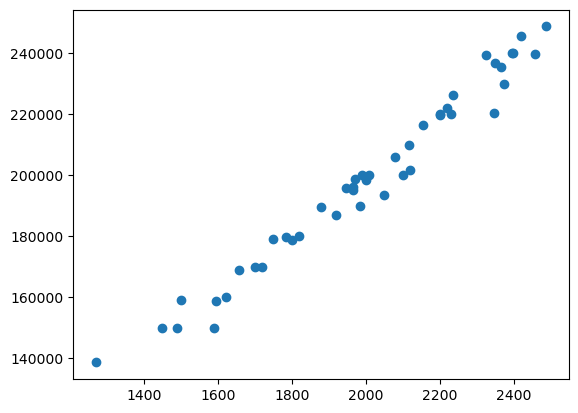

In [10]:
plt.scatter(X[:,1],Y)
plt.show()

In [26]:
def model(X,Y, learning_rate, iteration):
    m = Y.shape
    theta = np.zeros((2,1))
    
    for i in range(iteration):
        y_pred = np.dot(X,theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))


        d_theta = (1/m)*np.dot(X.T,y_pred -Y)
        theta = theta - learning_rate*d_theta

        cost_list.append(cost)

    return theta,cost_list
        

In [28]:
iteration = 100
learning_rate = 0.00000005
theta, cost_list = model(X, Y, learning_rate, iteration)

TypeError: unsupported operand type(s) for /: 'int' and 'tuple'

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the text file
data = np.loadtxt("dataset.txt", delimiter=",")

# Extract the sizes (X) and prices (Y)
X = data[:, 0]
Y = data[:, 1].reshape(X.size, 1)

# Add a column of ones to X for the bias term and transpose
X = np.vstack((np.ones((X.size, )), X)).T

def model(X, Y, learning_rate, iteration):
    # Initialize theta (parameters) to zeros
    theta = np.zeros((X.shape[1], 1))
    
    # List to store the cost at each iteration
    cost_list = []
    
    m = len(Y)
    
    for i in range(iteration):
        # Calculate the predictions
        predictions = X.dot(theta)
        
        # Calculate the error
        error = predictions - Y
        
        # Calculate the cost (Mean Squared Error)
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        
        # Append the cost to the list
        cost_list.append(cost)
        
        # Calculate the gradient
        gradient = (1 / m) * X.T.dot(error)
        
        # Update the parameters
        theta = theta - learning_rate * gradient
    
    return theta, cost_list

# Parameters for gradient descent
iteration = 100
learning_rate = 0.00000005

# Train the model
theta, cost_list = model(X, Y, learning_rate, iteration)



In [22]:
# price of 1567 sqare fit
np.dot([1,1567],theta)

array([155746.83577767])

In [24]:
new_houses = np.array([[1, 1547], [1, 1896], [1, 1934], [1,
2800], [1, 3400], [1, 5000]])
for house in new_houses :
    print("Our model predicts the price of house with",
house[1], "sq. ft. area as : $", round(np.dot(house, theta)[0],
2))


Our model predicts the price of house with 1547 sq. ft. area as : $ 153759.0
Our model predicts the price of house with 1896 sq. ft. area as : $ 188446.7
Our model predicts the price of house with 1934 sq. ft. area as : $ 192223.59
Our model predicts the price of house with 2800 sq. ft. area as : $ 278296.8
Our model predicts the price of house with 3400 sq. ft. area as : $ 337931.81
Our model predicts the price of house with 5000 sq. ft. area as : $ 496958.52


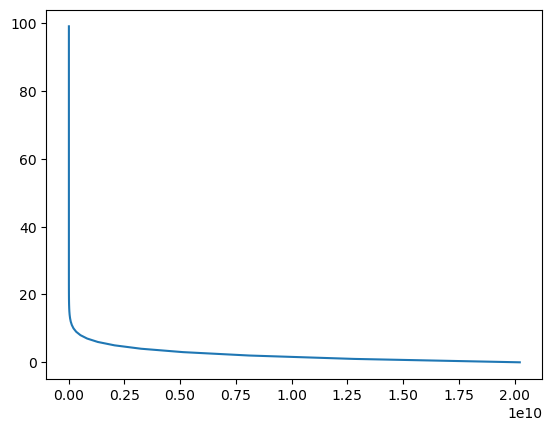

In [25]:
rng = np.arange(0, iteration)
plt.plot(cost_list, rng)
plt.show()

   Size   Price
0  1500  300000
1  1600  320000
2  1700  340000
3  1800  360000
4  1900  380000
Slope (m): 200.0
Intercept (b): 0.0


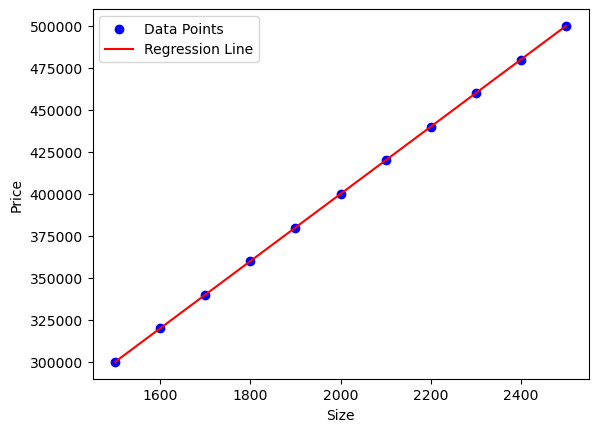

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
    
    def fit(self, X, y):
        n = len(X)
        numerator_m = (n * np.sum(X * y)) - (np.sum(X) * np.sum(y))
        denominator_m = (n * np.sum(X**2)) - (np.sum(X)**2)
        self.m = numerator_m / denominator_m
        
        self.b = (np.sum(y) - self.m * np.sum(X)) / n
    
    def predict(self, X):
        return self.m * X + self.b
    
    def plot(self, X, y):
        plt.scatter(X, y, color='blue', label='Data Points')
        plt.plot(X, self.predict(X), color='red', label='Regression Line')
        plt.xlabel('Size')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Load data from Excel file
file_path = 'house_prices.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())

# Extract features and target variable
X = data['Size'].values
y = data['Price'].values

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the slope and intercept
print(f"Slope (m): {model.m}")
print(f"Intercept (b): {model.b}")

# Plot the results
model.plot(X, y)


# another example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load  the dataset

In [5]:
data = pd.read_excel('house_prices.xlsx')

In [6]:
data.head()

,Size,Price
0,1500,300000
1,1600,320000
2,1700,340000
3,1800,360000
4,1900,380000


# prepare data

In [7]:
X = data['Size'].values
y= data['Price'].values

In [9]:
print(X)
print(y)

[1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500]
[300000 320000 340000 360000 380000 400000 420000 440000 460000 480000
 500000]


This extracts the 'Size' and 'Price' columns as numpy arrays.

# Implement Linear Regression from Scratch:

In [10]:
mean_x = np.mean(X)
mean_y = np.mean(y)

numerator = np.sum((X - mean_x) * (y - mean_y))
denominator = np.sum((X - mean_x) ** 2)

b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

print(f'Slope (b1): {b1}')
print(f'Intercept (b0): {b0}')


Slope (b1): 200.0
Intercept (b0): 0.0


## This calculates the slope (b1) and intercept (b0) using the least squares method.



Make Predictions:

In [12]:
y_pred = b0 + b1 * X


This computes the predicted house prices.

### Evaluate the Model:

In [13]:
mse = np.mean((y - y_pred) ** 2)

ss_total = np.sum((y - mean_y) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.0
R^2 Score: 1.0


This calculates the mean squared error and R^2 score to evaluate the model's performance.

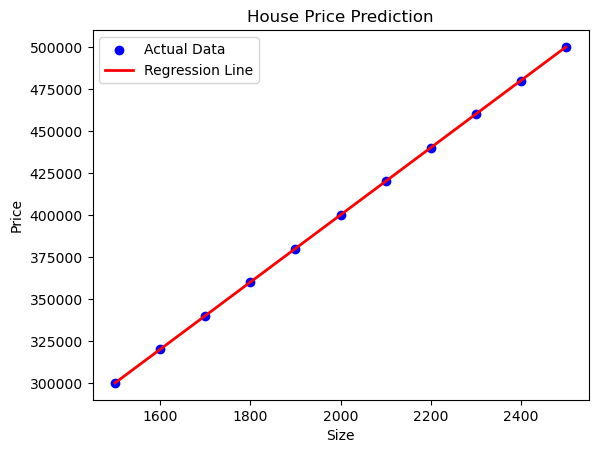

In [14]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()
plt.show()


In [15]:
# Optional: Calculate accuracy as a percentage
# Note: This is not a standard metric for regression models
# We'll define accuracy as (1 - sqrt(MSE) / mean_y) * 100
accuracy = (1 - (np.sqrt(mse) / mean_y)) * 100
print(f'Accuracy: {accuracy}%')


Accuracy: 100.0%


# my using the library method

In [1]:
import pandas as pd
df = pd.read_csv("test_dataset.csv")
df.head(5)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1200,1202,60,3,10400,1,3,3,0,0,...,0,0,0,0,0,3,2009,8,4,12.195517
1,1201,1203,50,4,6000,1,3,3,0,0,...,208,0,0,0,0,5,2009,8,4,11.669929
2,1202,1204,20,3,9750,1,3,3,0,4,...,0,0,0,0,0,10,2009,8,4,12.269047
3,1203,1205,20,3,10140,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,4,11.941456
4,1204,1206,20,3,14684,1,0,3,0,1,...,0,0,0,0,0,6,2009,8,4,12.513190


In [7]:
print(df.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Pool

#  here we take only  SalePrice so we split it 

In [8]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

print('shape of x = ', x.shape)
print('shape of y = ', y.shape)

shape of x =  (258, 71)
shape of y =  (258,)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

print("shape of x_train= ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test=", X_test.shape)
print("shape of y_test=", y_test.shape)
      

shape of x_train=  (206, 71)
shape of y_train =  (206,)
shape of x_test= (52, 71)
shape of y_test= (52,)


# feature scalling

In [17]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
sc.fit(X_train)
x_train = sc.transform(X_train)
x_test = sc.transform(X_test)

# now train the model using skelarn library 

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
# fit method is used to train the data
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
# let check , does our model has learn different coefficient or not , dot and tap 
lr.coef_
# yo sab b, b1, b2....

array([ 3.84018293e+00, -3.84128238e+00,  2.63815686e-02, -1.92986741e-02,
        2.22850446e-02, -1.38048382e+12, -2.32375279e-02, -1.81037905e-02,
       -7.19253028e+11,  6.56623654e-03, -2.52277327e-02, -8.39795863e-03,
        9.20345955e-03, -1.64519236e-02, -2.62261961e-02, -6.00398849e-03,
        6.15355182e-02,  7.93297001e-02,  7.35166866e-02, -2.63707956e-02,
        5.22915615e-03,  1.72555285e-02, -4.40282030e-02,  2.91339226e-02,
        3.86122960e-03, -6.97081441e-03,  2.68806873e-03,  1.55653981e-02,
        2.10275868e-02, -8.05799430e-03, -7.18196280e-03, -1.49163398e-02,
        4.69106188e-03,  7.06956908e+11,  7.44628906e-03,  2.84647963e+11,
        7.94073408e+11, -7.17940947e+11, -1.78833008e-02, -2.83508301e-02,
        1.40228271e-02,  4.27246094e-04,  1.97753906e-02, -2.44140625e-04,
        1.08589172e-01,  2.70996094e-02, -4.85229492e-03, -1.06811523e-04,
       -4.73022461e-04, -8.23974609e-04, -1.57928467e-02, -3.45535278e-02,
        1.18103027e-02,  

In [24]:
# let's check the intercept value that our model has predict
lr.intercept_

12.025789779793529

In [25]:
# now predict the test model
x_test[0,:]
# this is for single 

array([-0.14837794, -0.14268901,  0.11180596, -0.11133908, -0.01482347,
        0.        , -1.47304362,  0.33246651,  0.        ,  0.56244689,
       -0.21374115,  0.53692379,  0.01194973, -0.06984303, -0.40009952,
        0.99334774,  0.71943419, -0.57753256,  0.70775968,  0.39991915,
       -0.53953907, -0.11907481, -1.05837416, -1.18235189,  0.32171957,
       -0.6240797 , -0.86195604,  0.33329508,  0.81874412, -0.43433149,
        0.27426738,  0.66211305, -0.54031821,  0.61501737,  0.29338889,
       -0.28620896, -1.11298284, -0.73887428, -0.13064723, -0.81982091,
        0.28023924,  0.28742471,  1.21925186, -0.08270033,  0.77287221,
        1.16991517, -0.21374115,  0.78886497,  1.22062585,  0.10898088,
       -0.25953326, -0.48711714,  0.25619085,  0.58443775, -0.74726807,
       -0.32980384,  0.2311876 ,  0.27563274,  0.2519694 ,  0.35117253,
        1.06209645, -0.14996673, -0.34943519, -0.098987  , -0.24866658,
       -0.06984303, -0.09029217, -0.11952017,  1.59472096,  0.27

In [27]:
lr.predict([x_test[0,:]])
# this is for single SalePrice 

array([12.34596838])

In [28]:
lr.predict(x_test)
# this is for multiple SalePrice data

array([12.34585855, 12.08711862, 12.58268595, 12.0953642 , 12.26375505,
       12.35122263, 11.72824557, 11.92229488, 12.14184188, 11.67923006,
       12.26193164, 12.34380598, 11.84434977, 11.76292839, 12.80902132,
       12.9558773 , 11.39040786, 12.01665041, 12.20798827, 12.56560991,
       12.16848634, 11.54039983, 12.14819175, 11.78361334, 12.1548413 ,
       11.6512638 , 12.14551996, 11.86904284, 11.13391365, 11.63866734,
       12.38157277, 11.7451045 , 12.07038446, 12.60755708, 11.50527768,
       11.4825539 , 12.14161117, 11.47342478, 11.81257909, 12.03813464,
       11.52031418, 11.79531511, 11.96321091, 11.76279594, 12.33014782,
       12.11825478, 12.14199173, 11.67881471, 12.69935258, 11.42907271,
       11.56596248, 12.63808984])

 # loss function


In [31]:
# this is target value
y_test

120    12.154779
64     12.122147
193    12.546868
142    11.956553
207    12.278393
203    12.524526
196    11.835009
256    11.864462
153    12.043554
247    11.429544
79     12.332705
23     12.122691
71     11.827736
190    11.719940
240    12.644328
42     13.049793
143    11.594505
139    11.951180
39     12.323411
126    12.452933
0      12.195517
121    11.320554
231    12.136187
1      11.669929
58     11.925035
68     11.877569
59     12.106252
30     11.794338
123    10.915088
183    11.740061
10     12.007622
73     11.842229
127    12.081076
4      12.513190
14     11.736069
154    11.608236
252    12.128111
160    11.560763
175    11.669929
35     12.075394
226    11.686879
7      11.849398
63     12.106252
219    11.755872
159    12.468437
45     12.136187
72     12.083905
51     11.775290
184    12.429216
147    11.711776
248    11.820410
27     12.813918
Name: SalePrice, dtype: float64

In [30]:
lr.score(x_test, y_test)

0.8459939457374717

# this is 84 percentage accuracy